<a href="https://colab.research.google.com/github/Tabonnu/other/blob/main/math/%E8%87%AA%E4%BD%9C/math_chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#パーセプトロン

##計算の流れ

1 特徴ベクトルを準備する  
 特徴ベクトルはデータの持つ値をベクトル化したものです。$$Φ = \left(\begin{array}{c}x_{1}  
\\ x_{2}\end{array}\right)$$
2 係数ベクトルを準備する  
 係数ベクトルは決定境界の傾きを決定するものです。$$w = \left(\begin{array}{c}w_{1}\\ w_{2}\end{array}\right)$$

3 識別関数の値を計算
 特徴ベクトルと係数ベクトルの内積を計算します$$y(x) = f(w^{T}Φ(x))$$

4 活性化関数の値を計算  
 特徴ベクトルと係数ベクトルの内積を入力として、活性化関数の値を計算します。計算結果として、ラベル(＋1または－1)が得られます $$f(a) = \begin{cases}+1 & (a \geq 0)\\-1 & (a < 0)\end{cases}$$

In [32]:
pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

##特徴ベクトルを準備

In [36]:
dataset = pd.DataFrame({'x1': [1.5, 2, 3, 1.5, 0.5, -1, -2, -3, -1.5, 0],
                        'x2': [1, 2.5, 3, -2, 2, -3, -1.2, -0.5, 2, -1.5],
                        'label': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
                        'label_index': [1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0]})
dataset

,x1,x2,label,label_index
0,1.5,1.0,A,1.0
1,2.0,2.5,A,1.0
2,3.0,3.0,A,1.0
3,1.5,-2.0,A,1.0
4,0.5,2.0,A,1.0
5,-1.0,-3.0,B,-1.0
6,-2.0,-1.2,B,-1.0
7,-3.0,-0.5,B,-1.0
8,-1.5,2.0,B,-1.0
9,0.0,-1.5,B,-1.0


データを分類するために、データをプロットした図に直線を引き、この直線を境界としてラベルAの領域とラベルBの領域とに分ける方法を考えます。  
試しに直線$$x_{2} = - x_{1}$$で分けると図2のようになります。

In [38]:
label_a = dataset[dataset['label_index'] == 1]
label_a

,x1,x2,label,label_index
0,1.5,1.0,A,1.0
1,2.0,2.5,A,1.0
2,3.0,3.0,A,1.0
3,1.5,-2.0,A,1.0
4,0.5,2.0,A,1.0


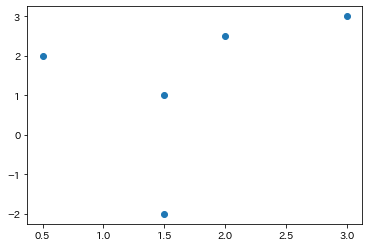

In [39]:
plt.scatter(label_a['x1'],label_a['x2'],label='Label A (1)',marker='o')

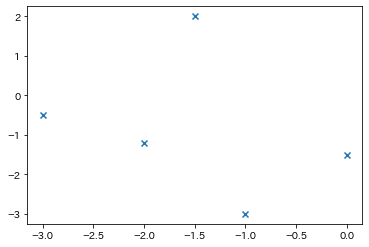

In [40]:
label_b = dataset[dataset['label_index']==-1]
plt.scatter(label_b['x1'],label_b['x2'],label ='Label B (-1)',marker='x')

##係数ベクトルを準備する

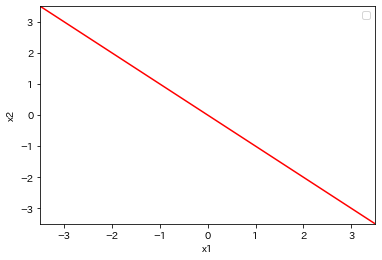

In [41]:
line_x = np.linspace(-4,4,4)
plt.plot(line_x,line_x*-1,'r-')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-3.5,3.5])
plt.ylim([-3.5,3.5])
plt.legend()

In [42]:
line_x

array([-4.        , -1.33333333,  1.33333333,  4.        ])

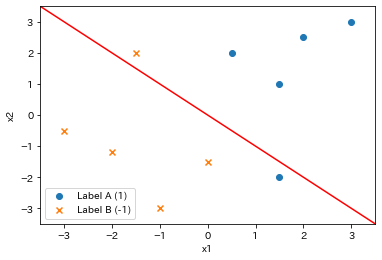

In [43]:
plt.scatter(label_a['x1'],label_a['x2'],label='Label A (1)',marker='o')
plt.scatter(label_b['x1'],label_b['x2'],label ='Label B (-1)',marker='x')
line_x = np.linspace(-4,4,4)
plt.plot(line_x,line_x*-1,'r-')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-3.5,3.5])
plt.ylim([-3.5,3.5])
plt.legend()

##識別関数と活性化関数をコードに

In [44]:
import copy

def discrimination(p,w):
  """
  識別関数
  param p: 特徴ベクトル
  param w: 係数ベクトル
  return:  識別結果
  """
  return np.dot(p,w) #内積を求める

In [50]:
def activate(x):
  """
  活性化関数(ステップ関数)
  param x: 識別結果
  return : ラベル
  """

  if -1<x:
    return 1
  else:
    return -1

deta_size = len(dataset.index)

#特徴ベクトル
x = np.array(dataset.loc[:,['x1','x2']]) #locで要素を抽出　#すべての行からx1列とx2列を抽出

#係数ベクトル
w = [1,1]

In [46]:
x

array([[ 1.5,  1. ],
       [ 2. ,  2.5],
       [ 3. ,  3. ],
       [ 1.5, -2. ],
       [ 0.5,  2. ],
       [-1. , -3. ],
       [-2. , -1.2],
       [-3. , -0.5],
       [-1.5,  2. ],
       [ 0. , -1.5]])

In [54]:
#正解ラベル
label_answer = np.array(dataset['label_index'])

#識別関数の値
output_test = np.zeros(deta_size) #全ての要素を0で初期化

#予測ラベル
label_test = np.zeros(deta_size) #全ての要素を0で初期化

#予測結果の正否
result = np.zeros(deta_size) #全ての要素を0で初期化

#データセットからラベルの予測
for i in range(deta_size):
  output_test[i] = discrimination(x[i],w)
  label_test[i] = activate(output_test[i])
  result[i] = label_answer[i] == label_test[i] #両辺が等しいときに1を、違うときに0を格納


In [57]:
result

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

In [58]:
#予測結果の出力

dataset_test = copy.deepcopy(dataset) #イミュータブルなオブジェクトのコピー
dataset_test['識別関数の値'] = output_test
dataset_test['予測ラベル'] = label_test
dataset_test['予測の正否'] = result
dataset_test

,x1,x2,label,label_index,識別関数の値,予測ラベル,予測の正否
0,1.5,1.0,A,1.0,2.5,1.0,1.0
1,2.0,2.5,A,1.0,4.5,1.0,1.0
2,3.0,3.0,A,1.0,6.0,1.0,1.0
3,1.5,-2.0,A,1.0,-0.5,1.0,1.0
4,0.5,2.0,A,1.0,2.5,1.0,1.0
5,-1.0,-3.0,B,-1.0,-4.0,-1.0,1.0
6,-2.0,-1.2,B,-1.0,-3.2,-1.0,1.0
7,-3.0,-0.5,B,-1.0,-3.5,-1.0,1.0
8,-1.5,2.0,B,-1.0,0.5,1.0,0.0
9,0.0,-1.5,B,-1.0,-1.5,-1.0,1.0


x1 = 8 の時にエラーが発生している  
↓  
wを変化させることでより精度を高めることが出来そう。  
↓  
wを変えた際に判定精度が高くなったかどうかを判断するための何か、判断基準が必要  
↓  
パーセプトロンでは、誤差関数を使って判定精度が高くなったかどうかを判断します。

誤差関数の計算式$$-\sum_n^Mw^{T}φ(n)t(n)$$  
(間違って分類したデータの特徴ベクトルと係数ベクトルとの内積の絶対値を合計したもの)

In [59]:
#誤差

error = 0

for i in range(deta_size):
  if result[i] == 0:
    error -= output_test[i]*label_answer[i]

pd.DataFrame([[np.sum(result==0),error]],columns=['誤分類の個数','誤差'])

,誤分類の個数,誤差
0,1,0.5
